<a href="https://colab.research.google.com/github/Advaitt19/Hello-world/blob/Classification_stars/My_project_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing the Necessary librairy #
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
# importing the packages and NAME them as #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer,label_binarize
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Importing the Csv file as data to data frame #
data = pd.read_csv("star_classification.csv")

In [ ]:
# Finding out the shape the rows & columns the dimensions of the file #
print("Shape:", data.shape)

Shape: (100000, 18)


In [ ]:
# Seeing the Data in structured way with names #
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


Class Distribution:
class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


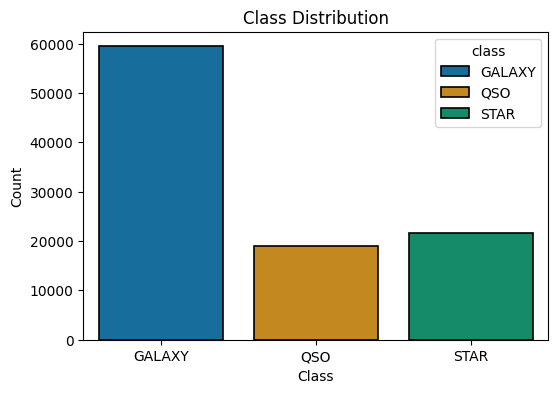

In [ ]:
# Counting and visual plot of count of Class and types #
print("Class Distribution:")
print(data["class"].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="class", palette="colorblind",hue="class",legend=True,edgecolor="black", linewidth=1.2)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


In [ ]:
# There are some columns which can mislead the model so naming the unwanted columns into a drop_columns variable #
drop_columns = ['obj_ID','spec_obj_ID','run_ID','rerun_ID','cam_col',
             'field_ID','plate','MJD','fiber_ID']

In [ ]:
# Removing the columns from data frame #
data = data.drop(columns=drop_columns, errors="ignore")

In [ ]:
#Feature engineering is also importanta for various helpful insights #
data["ug"] = data["u"] - data["g"]
data["gr"] = data["g"] - data["r"]
data["ri"] = data["r"] - data["i"]
data["iz"] = data["i"] - data["z"]
data["ur"] = data["u"] - data["r"]
data["log_redshift"] = np.log1p(data["redshift"])

In [ ]:
# Naming the important and feature engineered columns from data frame into feature variable #
features = ["u","g","r","i","z","redshift","ug","gr","ri","iz","ur","log_redshift"]

In [ ]:
# data head after removing the unwanted columns #
data.head()

,alpha,delta,u,g,r,i,z,class,redshift,ug,gr,ri,iz,ur,log_redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,1.60352,1.88029,1.22928,0.37202,3.48381,0.491517
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,1.94571,0.24744,1.41632,-0.44615,2.19315,0.576128
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,2.59918,2.05413,1.26119,0.40030,4.65331,0.497251
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,-1.63974,2.16494,1.10708,1.25444,0.52520,0.658735
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,1.85690,1.08281,0.52036,0.43250,2.93971,0.109861


In [ ]:
# Finding out if there is any null values for data purity #
data.isnull().sum()

,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
class,0
redshift,0
ug,0


In [ ]:
# Defining the Feature varibales and Target Variables #
X = data[features]
y = LabelEncoder().fit_transform(data["class"])

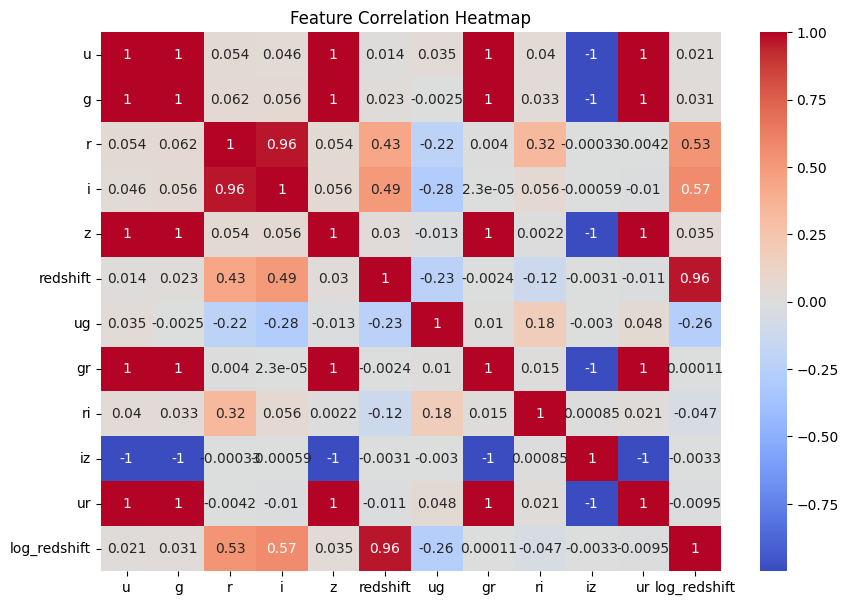

In [ ]:
#Doing correlation within the feature variables # EDA #
plt.figure(figsize=(10,7))
corr = data[features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Splitting the data into test and train subsets with test size of 20% #
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
# We have performed all the models and found out that Random forest is the best model in  Multiclass classifcation for star_classification dataset #
Random_forest = RandomForestClassifier(random_state=42)

In [ ]:
#fitting the Model with train data #
Model = Random_forest.fit(X_train, y_train)

In [ ]:
#Predicting the base model #
y_pred_base = Model.predict(X_test)

In [ ]:
# The accuracy of the Model found #
accuracy_base = accuracy_score(y_test, y_pred_base)
print(accuracy_base)

0.9805


In [ ]:
# classification report for Base Model #
print(classification_report(y_test, y_pred_base))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11889
           1       0.97      0.93      0.95      3792
           2       1.00      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



In [ ]:
# Hyper paramter tuning with all this paramters for best tuned model #
param_grid__ = {"n_estimators": [50,100,200,300],
              "max_depth": [None,5,10,20],
              "min_samples_split": [2,5,10],
              "min_samples_leaf": [1,2,4],
              "max_features":["sqrt"]
 }

In [ ]:
# found these paramters as best tuned #
param_grid = {"n_estimators": [100],
              "max_depth": [10],
              "min_samples_split": [2],
              "min_samples_leaf": [1],
              "max_features":["sqrt"]
              }

In [ ]:
# Variable the randomm forest model #
Random_forest_tuned = RandomForestClassifier(random_state=42)

In [ ]:
# Setting the grid and model fitting for training #
grid= GridSearchCV(Random_forest_tuned, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
Grid_model= grid.fit(X_train, y_train)

In [ ]:
#Predicting the tuned  model #
y_predict_tuned = Grid_model.predict(X_test)

In [ ]:
# Best Tuned paramters found #
print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# The accuracy of the Tuned Model found #
accuracy_tuned = accuracy_score(y_test, y_predict_tuned)
print(accuracy_tuned)

0.9798


In [ ]:
# Classifciation report for tuned model #
print(classification_report(y_test, y_predict_tuned))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11889
           1       0.97      0.93      0.95      3792
           2       1.00      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



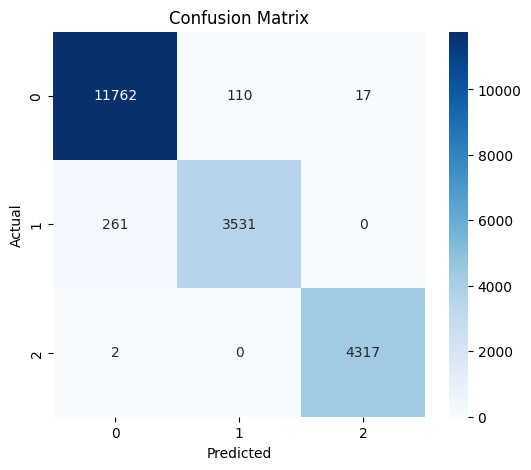

In [ ]:
# Confusion matrix correlation #
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_base)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

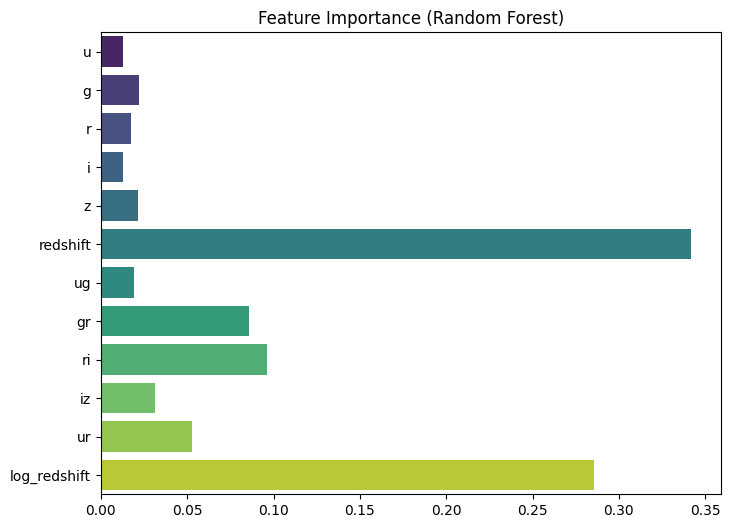

In [ ]:
# for Base model the important features #
plt.figure(figsize=(8,6))
importances = Model.feature_importances_
sns.barplot(x=importances, y=features, palette="viridis", hue=features, legend=False)
plt.title("Feature Importance (Random Forest)")
plt.show()

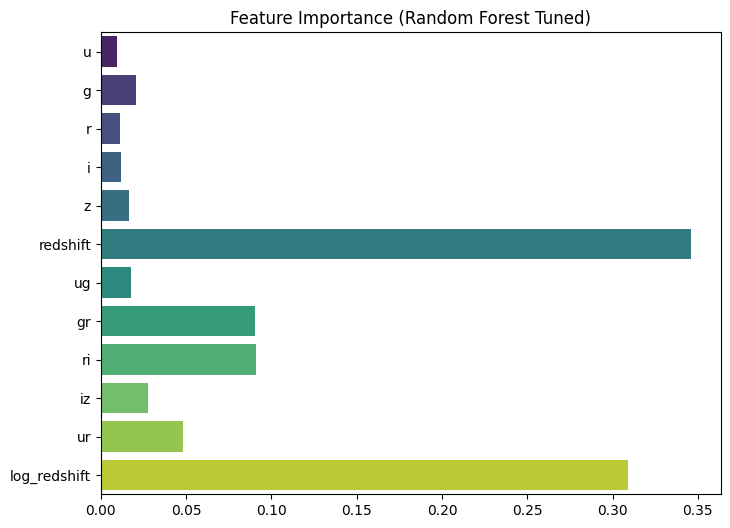

In [ ]:
# for Grid model feature impirtant features #
plt.figure(figsize=(8,6))
importances = Grid_model.best_estimator_.feature_importances_
sns.barplot(x=importances, y=features, palette="viridis", hue=features, legend=False)
plt.title("Feature Importance (Random Forest Tuned)")
plt.show()

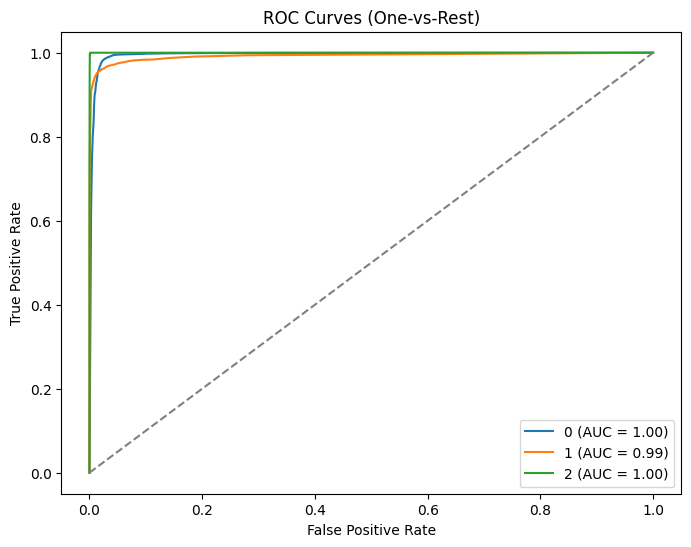

In [ ]:
# Encode labels for ROC
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_score = Model.predict_proba(X_test)

# Binarize classes
y_test_bin = label_binarize(y_test_encoded, classes=[0,1,2])

plt.figure(figsize=(8,6))
for i, class_label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_score[:,i])
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend()
plt.show()

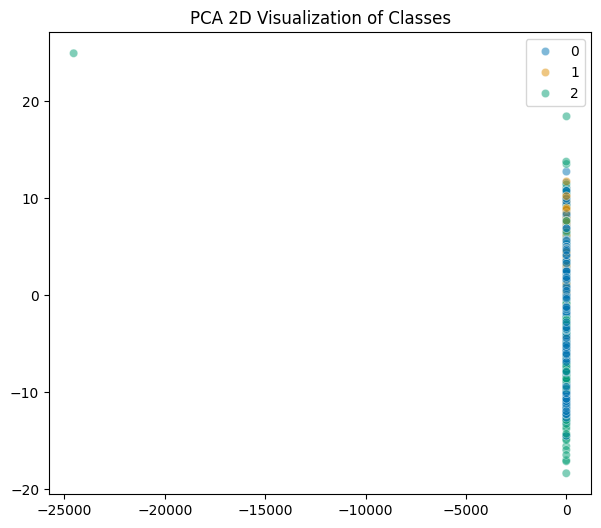

In [ ]:
# pca visulization for classes  in 2-D #
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, alpha=0.5, palette="colorblind")
plt.title("PCA 2D Visualization of Classes")
plt.show()

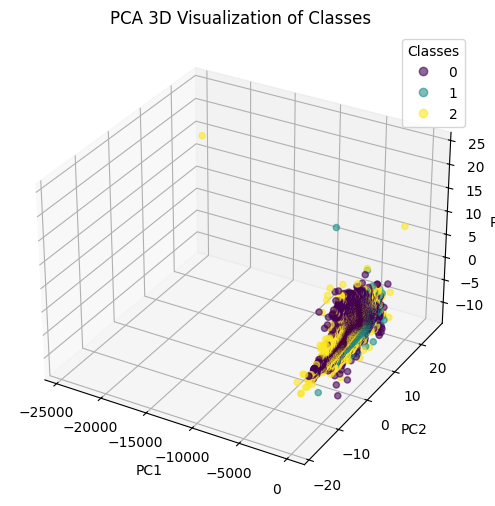

In [ ]:
# pca visulization for classes  in 3-D #
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],
                     c=y, cmap="viridis", alpha=0.6)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA 3D Visualization of Classes")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


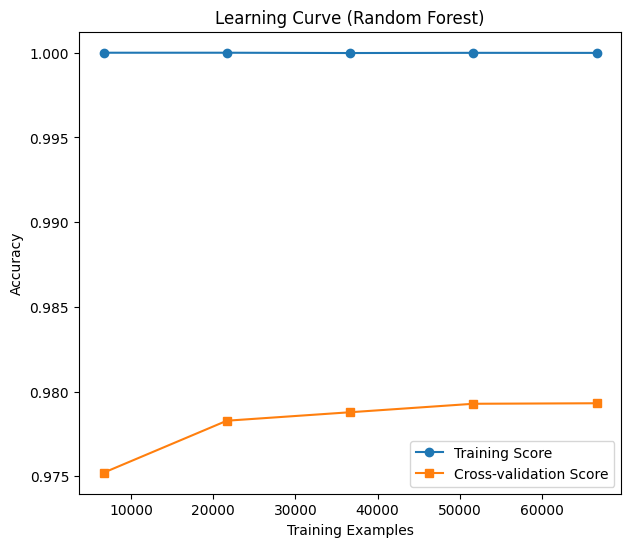

In [ ]:
#LEARNING RATE CURVE FOR ACCURACY #
train_sizes, train_scores, test_scores = learning_curve(
    Model, X, y, cv=3, scoring="accuracy",
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(7,6))
plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_mean, label="Cross-validation Score", marker='s')
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# TESTING AND TRAINING ACCURACY #
train_acc = Model.score(X_train, y_train)
test_acc = Model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Testing Accuracy: {test_acc:.3f}")

Training Accuracy: 1.000
Testing Accuracy: 0.981


In [ ]:
# VALIDATION SCORE METRICS #
cv_scores = cross_val_score(Model, X, y, cv=3, scoring="accuracy", n_jobs=-1)
print(f"Cross-validation accuracy: {cv_scores.mean():.3f} +/- {cv_scores.std():.3f}")

Cross-validation accuracy: 0.979 +/- 0.000


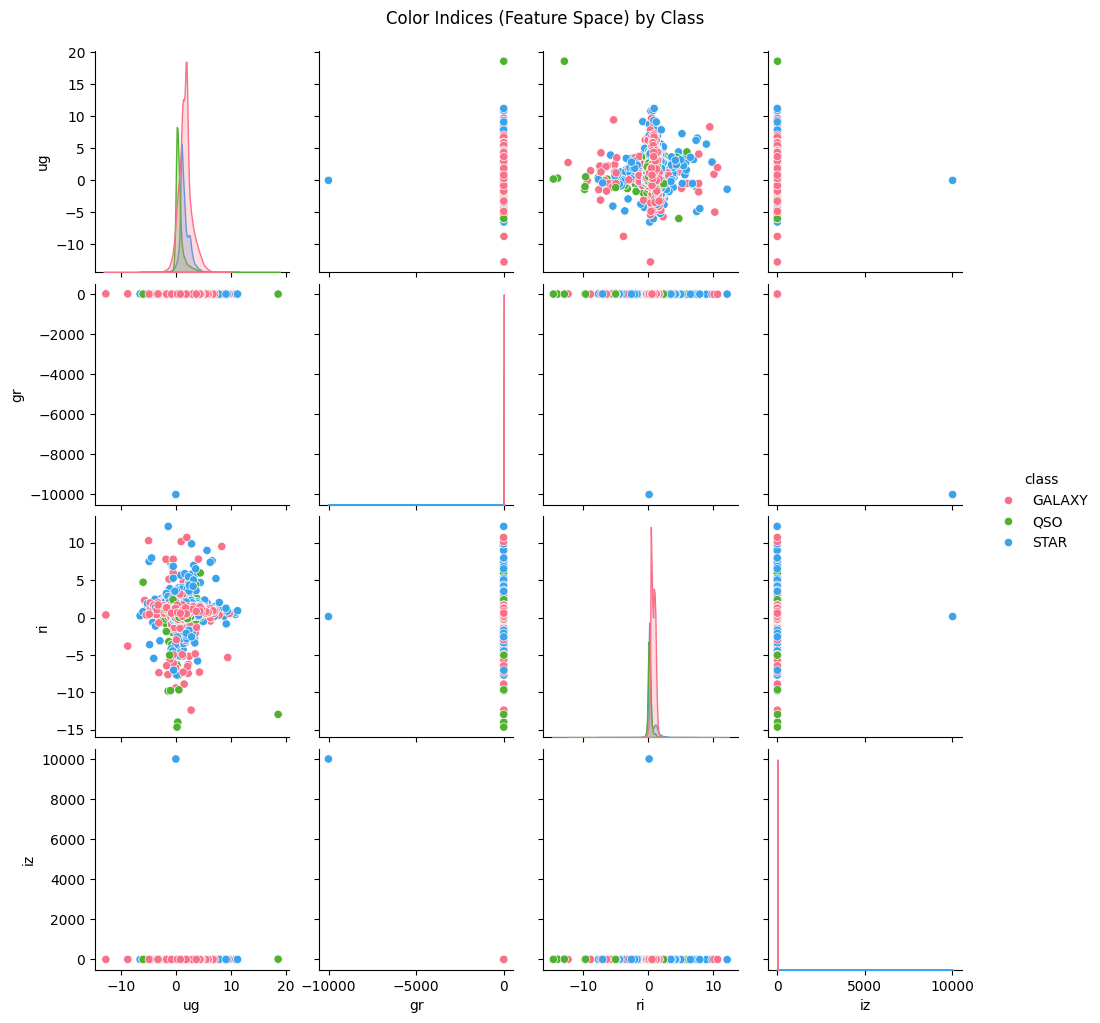

In [ ]:
# Pairplot to see separation between classes Some plots for more Vsiulization #
sns.pairplot(data, vars=['ug', 'gr', 'ri', 'iz'], hue="class", diag_kind="kde", palette="husl")
plt.suptitle("Color Indices (Feature Space) by Class", y=1.02)
plt.show()

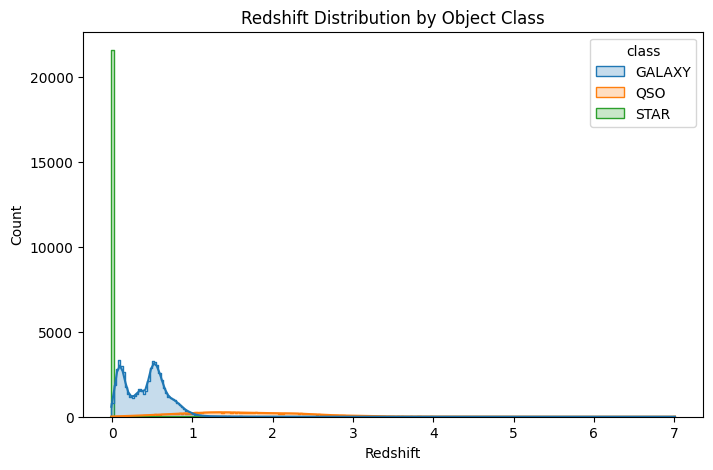

In [ ]:
#intensity plot vs class #
plt.figure(figsize=(8,5))
sns.histplot(data=data, x="redshift", hue="class", kde=True, element="step")
plt.title("Redshift Distribution by Object Class")
plt.xlabel("Redshift")
plt.ylabel("Count")
plt.show()


In [ ]:
print("Feature names used during fitting:", features)

Feature names used during fitting: ['u', 'g', 'r', 'i', 'z', 'redshift', 'ug', 'gr', 'ri', 'iz', 'ur', 'log_redshift']


In [ ]:
test_data = pd.DataFrame({
    "u": [26.0],
    "g": [26.0],
    "r": [26.0],
    "i": [26.0],
    "z": [26.0],
    "redshift": [0.0],
    "ug": [26.0],
    "gr": [26.0],
    "ri": [26.0],
    "iz": [26.0],
    "ur": [26.0],
    "log_redshift": [0.0]
})

In [ ]:
new_pred= Model.predict(test_data)

In [ ]:
label_map = {0: "Galaxy", 1: "QSO", 2: "Star"}
print("Decoded Class:", label_map[new_pred[0]])


Decoded Class: QSO


In [ ]:
import joblib

# Save model and encoder
joblib.dump(Model, "astro_model.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']